In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential

# 데이터 준비

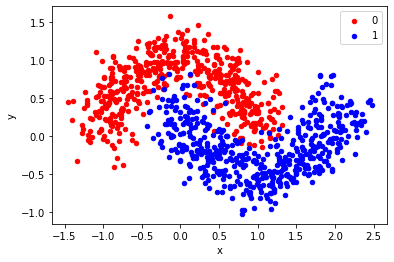

In [2]:
from sklearn.datasets import make_moons


# 데이터 생성
x, y = make_moons(n_samples=1000, noise=0.2, random_state=32)


# 데이터 그림 그리기
df = DataFrame(dict(x=x[:,0], y=x[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()



=========================== 1th K-Fold ==============================



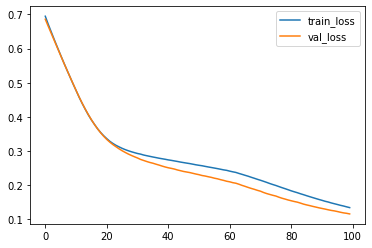

7/7 [==============================] - 0s 3ms/step - loss: 0.1270 - acc: 0.9550
loss= 0.12700849771499634
acc= 0.9549999833106995
[[93  5]
 [ 4 98]]


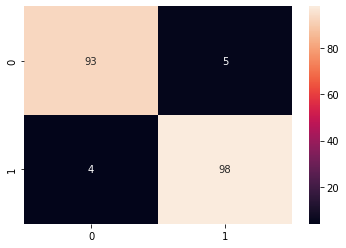

              precision    recall  f1-score   support

           0       0.96      0.95      0.95        98
           1       0.95      0.96      0.96       102

    accuracy                           0.95       200
   macro avg       0.96      0.95      0.95       200
weighted avg       0.96      0.95      0.95       200


=========================== 2th K-Fold ==============================



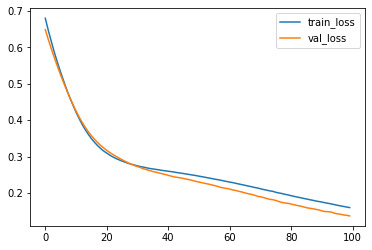

7/7 [==============================] - 0s 3ms/step - loss: 0.1789 - acc: 0.9400
loss= 0.17893387377262115
acc= 0.9399999976158142
[[ 84   8]
 [  4 104]]


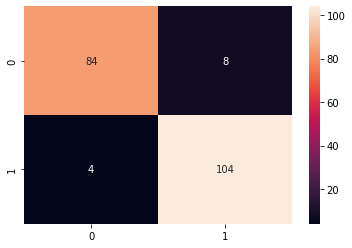

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        92
           1       0.93      0.96      0.95       108

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200


=========================== 3th K-Fold ==============================



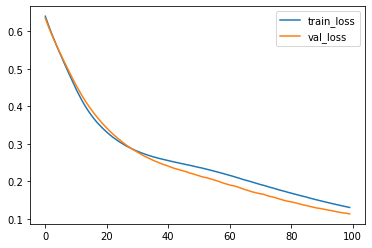

7/7 [==============================] - 0s 3ms/step - loss: 0.1508 - acc: 0.9300
loss= 0.15080972015857697
acc= 0.9300000071525574
[[ 85   8]
 [  6 101]]


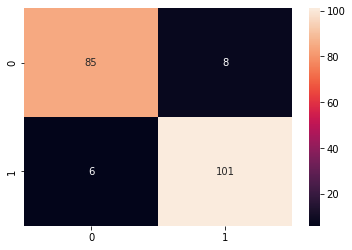

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        93
           1       0.93      0.94      0.94       107

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200


=========================== 4th K-Fold ==============================



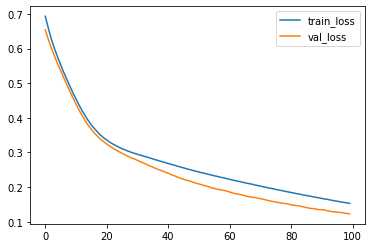

7/7 [==============================] - 0s 3ms/step - loss: 0.1438 - acc: 0.9450
loss= 0.1438063383102417
acc= 0.9449999928474426
[[104   3]
 [  8  85]]


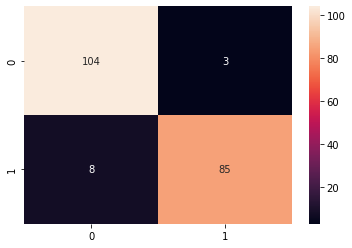

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       107
           1       0.97      0.91      0.94        93

    accuracy                           0.94       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.95      0.94      0.94       200


=========================== 5th K-Fold ==============================



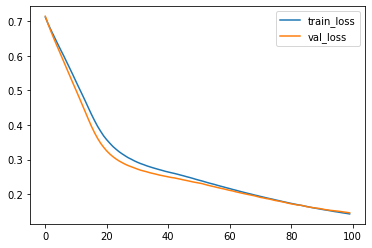

7/7 [==============================] - 0s 3ms/step - loss: 0.1141 - acc: 0.9550
loss= 0.11409472674131393
acc= 0.9549999833106995
[[107   3]
 [  6  84]]


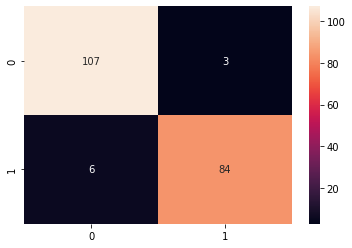

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       110
           1       0.97      0.93      0.95        90

    accuracy                           0.95       200
   macro avg       0.96      0.95      0.95       200
weighted avg       0.96      0.95      0.95       200


=========================== Aggregated ==============================

[[473  27]
 [ 28 472]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       500
           1       0.95      0.94      0.94       500

    accuracy                           0.94      1000
   macro avg       0.95      0.94      0.94      1000
weighted avg       0.95      0.94      0.94      1000



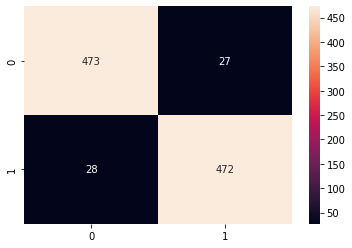

In [3]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

all_test_y = []
all_predicted = []

i = 1
for train_index, test_index in KFold(n_splits=5).split(x, y):
    print()
    print(f"=========================== {i}th K-Fold ==============================")
    print()
    i += 1

    train_x, test_x = x[train_index], x[test_index]
    train_y, test_y = y[train_index], y[test_index]

    model = Sequential()
    model.add(Input(2))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(2, activation="softmax"))
    model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=["acc"])

    base_history = model.fit(train_x, train_y, epochs=100, batch_size=128, verbose=0, validation_split=0.2)


    plt.plot(base_history.history['loss'], label='train_loss')
    plt.plot(base_history.history['val_loss'], label='val_loss')
    plt.legend()
    plt.show()

    loss, acc = model.evaluate(test_x, test_y)
    print("loss=", loss)
    print("acc=", acc)


    y_ = model.predict(test_x)
    predicted = np.argmax(y_, axis=-1)

    cm = confusion_matrix(test_y, predicted)
    print(cm)
    sns.heatmap(cm, annot=True, fmt="d")
    plt.show()

    print(classification_report(test_y, predicted))
    all_test_y.extend(test_y)
    all_predicted.extend(predicted)


print()
print(f"=========================== Aggregated ==============================")
print()

cm = confusion_matrix(all_test_y, all_predicted)
print(cm)
plt.show()
sns.heatmap(cm, annot=True, fmt="d")

print(classification_report(all_test_y, all_predicted))
    